In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty/")

In [3]:
import datajoint_utils as du
import neuron_visualizations as nviz
import proofread_verification as pv
import networkx_utils as xu

INFO - 2021-09-21 19:54:15,714 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-09-21 19:54:15,716 - settings - Setting database.user to celiib
INFO - 2021-09-21 19:54:15,717 - settings - Setting database.password to newceliipass
INFO - 2021-09-21 19:54:15,718 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-09-21 19:54:15,719 - settings - Setting database.user to celiib
INFO - 2021-09-21 19:54:15,720 - settings - Setting database.password to newceliipass
INFO - 2021-09-21 19:54:15,732 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-09-21 19:54:16,466 - settings - Setting enable_python_native_blobs to True
INFO - 2021-09-21 19:54:16,529 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-09-21 19:54:16,531 - settings - Setting database.user to celiib
INFO - 2021-09-21 19:54:16,532 - settings - Setting database.password to newceliipass
INFO - 2021-09-21 19:54:16,533 - settings - Setting enable_python_native_blobs to True
INFO - 2021-09-21 19:54:17,293 - settings - Setting enable_python_native_blobs to True
INFO - 2021-09-21 19:54:17,359 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-09-21 19:54:17,361 - settings - Setting database.user to celiib
INFO - 2021-09-21 19:54:17,361 - settings - Setting database.password to newceliipass
INFO - 2021-09-21 19:54:17,362 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-09-21 19:54:17,363 - settings - Setting database.user to celiib
INFO - 2021-09-21 19:54:17,364 - settings - Setting database.pa

In [ ]:
import allen_utils as alu
alu.initialize_client()
alu.set_client_version()

# Loading the Graph

In [5]:
import system_utils as su
G = su.decompress_pickle("/platinum_graph/Data/G_query_v6_filtered.pbz2")

# Edge Attributes

In [6]:
segment_ids = ["864691136830770542_0","864691136881594990_0"]
G["864691136830770542_0"]["864691136881594990_0"]

AtlasView({0: {'postsyn_branch_idx': 1.0, 'postsyn_compartment_coarse': 'dendrite', 'postsyn_compartment_fine': 'basal', 'postsyn_limb_idx': 2.0, 'postsyn_nucleus_id': 431048, 'postsyn_skeletal_distance_to_soma': 21029.669921875, 'postsyn_spine_bouton': 'shaft', 'presyn_branch_idx': 211.0, 'presyn_compartment_coarse': 'axon', 'presyn_compartment_fine': nan, 'presyn_limb_idx': 0.0, 'presyn_nucleus_id': 432811, 'presyn_skeletal_distance_to_soma': 189499.3125, 'presyn_spine_bouton': 'bouton', 'proof_type': 'auto', 'synapse_id': 299949435, 'synapse_size': 2092, 'synapse_x': 259684, 'synapse_y': 185164, 'synapse_z': 24809, 'presyn_soma_euclid_dist': 50176.854903431326, 'postsyn_soma_euclid_dist': 28741.23810833486, 'presyn_soma_postsyn_soma_euclid_dist': 64384.34356270164, 'presyn_soma_postsyn_soma_skeletal_dist': 210528.982421875}})

# Soma Soma Skeletal Distance vs Euclidean Across Syanpses

In [7]:
from tqdm_utils import tqdm

In [8]:
attr_to_gather = dict(presyn_soma_postsyn_soma_euclid_dist = [],
                     presyn_soma_postsyn_soma_skeletal_dist = [])
for presyn in tqdm(G.nodes()):
    for postsyn in G[presyn]:
        e_dict = dict(G[presyn][postsyn])
        for edge_idx,edge_attr in e_dict.items():
            for k in attr_to_gather.keys():
                attr_to_gather[k].append(edge_attr[k])

  0%|          | 0/68001 [00:00<?, ?it/s]

Text(0, 0.5, 'presyn_soma_postsyn_soma_skeletal_dist (um)')

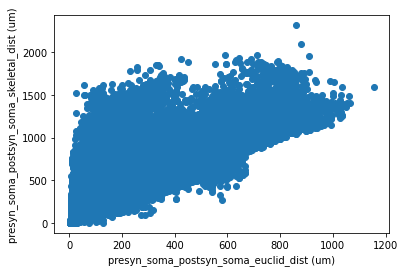

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.subplots(1,1)


x_name = "presyn_soma_postsyn_soma_euclid_dist"
y_name = "presyn_soma_postsyn_soma_skeletal_dist"
ax.scatter(np.array(attr_to_gather[x_name])/1000,
          np.array(attr_to_gather[y_name])/1000)

ax.set_xlabel(x_name + " (um)")
ax.set_ylabel( y_name + " (um)")